In [18]:
from __future__ import annotations
import sys
    # caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, 'D:/books/python/0.Data Science from Scratch- First Principles with Python/data-science-from-scratch/scratch/')
sys.path

['D:\\books\\python\\0.Data Science from Scratch- First Principles with Python',
 'D:/books/python/0.Data Science from Scratch- First Principles with Python/data-science-from-scratch/scratch/',
 'D:/books/python/0.Data Science from Scratch- First Principles with Python/data-science-from-scratch/scratch/',
 'C:\\Users\\lidan\\miniconda3\\python38.zip',
 'C:\\Users\\lidan\\miniconda3\\DLLs',
 'C:\\Users\\lidan\\miniconda3\\lib',
 'C:\\Users\\lidan\\miniconda3',
 '',
 'C:\\Users\\lidan\\AppData\\Roaming\\Python\\Python38\\site-packages',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\magic_impute-2.0.4-py3.8.egg',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\seqc-0.2.0-py3.8.egg',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\weasyprint-56.1-py3.8.egg',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\cairocffi-1.3.0-py3.8.egg',
 'C:\\Users\\lidan\\miniconda3\\lib\\site-packages\\win32',
 'C:\\Users\\lidan\\minicond

In [2]:
from typing import List
from collections import Counter
Counter(['a', 'b', 'c', 'b'])

Counter({'a': 1, 'b': 2, 'c': 1})

In [6]:
Counter(['a', 'b', 'c', 'b']).most_common(1)

[('b', 2)]

In [8]:
Counter(['a', 'b', 'c', 'b']).most_common(1)[0]

('b', 2)

In [7]:
Counter(['a', 'b', 'c', 'b']).most_common(2)

[('b', 2), ('a', 1)]

In [9]:
Counter(['a', 'b', 'c', 'b']).most_common(2)[0]

('b', 2)

In [11]:
Counter(['a', 'b', 'c', 'b']).values()

dict_values([1, 2, 1])

In [12]:
Counter(['a', 'b', 'c', 'b']).items()

dict_items([('a', 1), ('b', 2), ('c', 1)])

In [13]:
Counter(['a', 'b', 'c', 'b']).keys()

dict_keys(['a', 'b', 'c'])

In [10]:
from typing import List
from collections import Counter

def raw_majority_vote(labels: List[str]) -> str:
    votes = Counter(labels)
    winner, _ = votes.most_common(1)[0]
    return winner

assert raw_majority_vote(['a', 'b', 'c', 'b']) == 'b'

In [14]:
def majority_vote(labels: List[str]) -> str:
    """Assumes that labels are ordered from nearest to farthest."""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                       for count in vote_counts.values()
                       if count == winner_count])

    if num_winners == 1:
        return winner                     # unique winner, so return it
    else:
        return majority_vote(labels[:-1]) # try again without the farthest

# Tie, so look at first 4, then 'b'
assert majority_vote(['a', 'b', 'c', 'b', 'a']) == 'b'

In [15]:
from typing import NamedTuple
from linear_algebra import Vector, distance

class LabeledPoint(NamedTuple):
    point: Vector
    label: str

def knn_classify(k: int,
                 labeled_points: List[LabeledPoint],
                 new_point: Vector) -> str:

    # Order the labeled points from nearest to farthest.
    by_distance = sorted(labeled_points,
                         key=lambda lp: distance(lp.point, new_point))

    # Find the labels for the k closest
    k_nearest_labels = [lp.label for lp in by_distance[:k]]

    # and let them vote.
    return majority_vote(k_nearest_labels)



In [20]:
import requests
data = requests.get(
"https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
)
with open('iris.data', 'w') as f:
    f.write(data.text)

In [22]:
import random

def random_point(dim: int) -> Vector:
    return [random.random() for _ in range(dim)]

def random_distances(dim: int, num_pairs: int) -> List[float]:
    return [distance(random_point(dim), random_point(dim))
            for _ in range(num_pairs)]

In [26]:
from typing import Dict
import csv
from collections import defaultdict
    
def parse_iris_row(row: List[str]) -> LabeledPoint:
        """
        sepal_length, sepal_width, petal_length, petal_width, class
        """
        measurements = [float(value) for value in row[:-1]]
        # class is e.g. "Iris-virginica"; we just want "virginica"
        label = row[-1].split("-")[-1]
    
        return LabeledPoint(measurements, label)

In [33]:
with open('iris.data') as f:
    reader = csv.reader(f)
    iris_data = [parse_iris_row(row) for row in reader]
    
iris_data[:5]

[LabeledPoint(point=[5.1, 3.5, 1.4, 0.2], label='setosa'),
 LabeledPoint(point=[4.9, 3.0, 1.4, 0.2], label='setosa'),
 LabeledPoint(point=[4.7, 3.2, 1.3, 0.2], label='setosa'),
 LabeledPoint(point=[4.6, 3.1, 1.5, 0.2], label='setosa'),
 LabeledPoint(point=[5.0, 3.6, 1.4, 0.2], label='setosa')]

In [39]:
# We'll also group just the points by species/label so we can plot them.
points_by_species: Dict[str, List[Vector]] = defaultdict(list)
for iris in iris_data:
    points_by_species[iris.label].append(iris.point)
        
points_by_species['setosa'][:5]

[[5.1, 3.5, 1.4, 0.2],
 [4.9, 3.0, 1.4, 0.2],
 [4.7, 3.2, 1.3, 0.2],
 [4.6, 3.1, 1.5, 0.2],
 [5.0, 3.6, 1.4, 0.2]]

In [45]:
points_by_species.items()

dict_items([('setosa', [[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [4.7, 3.2, 1.3, 0.2], [4.6, 3.1, 1.5, 0.2], [5.0, 3.6, 1.4, 0.2], [5.4, 3.9, 1.7, 0.4], [4.6, 3.4, 1.4, 0.3], [5.0, 3.4, 1.5, 0.2], [4.4, 2.9, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.4, 3.7, 1.5, 0.2], [4.8, 3.4, 1.6, 0.2], [4.8, 3.0, 1.4, 0.1], [4.3, 3.0, 1.1, 0.1], [5.8, 4.0, 1.2, 0.2], [5.7, 4.4, 1.5, 0.4], [5.4, 3.9, 1.3, 0.4], [5.1, 3.5, 1.4, 0.3], [5.7, 3.8, 1.7, 0.3], [5.1, 3.8, 1.5, 0.3], [5.4, 3.4, 1.7, 0.2], [5.1, 3.7, 1.5, 0.4], [4.6, 3.6, 1.0, 0.2], [5.1, 3.3, 1.7, 0.5], [4.8, 3.4, 1.9, 0.2], [5.0, 3.0, 1.6, 0.2], [5.0, 3.4, 1.6, 0.4], [5.2, 3.5, 1.5, 0.2], [5.2, 3.4, 1.4, 0.2], [4.7, 3.2, 1.6, 0.2], [4.8, 3.1, 1.6, 0.2], [5.4, 3.4, 1.5, 0.4], [5.2, 4.1, 1.5, 0.1], [5.5, 4.2, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.0, 3.2, 1.2, 0.2], [5.5, 3.5, 1.3, 0.2], [4.9, 3.1, 1.5, 0.1], [4.4, 3.0, 1.3, 0.2], [5.1, 3.4, 1.5, 0.2], [5.0, 3.5, 1.3, 0.3], [4.5, 2.3, 1.3, 0.3], [4.4, 3.2, 1.3, 0.2], [5.0, 3.5, 1.6, 0.6], [5.1, 3.

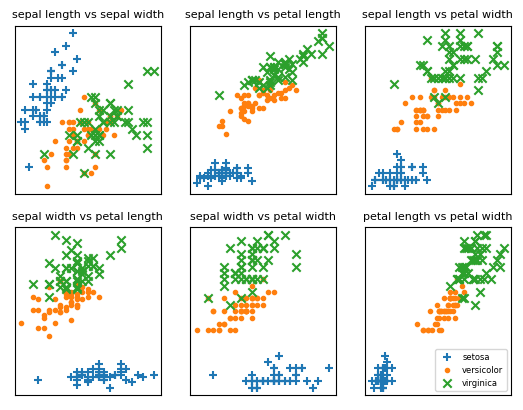

In [40]:
from matplotlib import pyplot as plt
metrics = ['sepal length', 'sepal width', 'petal length', 'petal width']
pairs = [(i, j) for i in range(4) for j in range(4) if i < j]
marks = ['+', '.', 'x']  # we have 3 classes, so 3 markers
    
fig, ax = plt.subplots(2, 3)
    
for row in range(2):
    for col in range(3):
        i, j = pairs[3 * row + col]
        ax[row][col].set_title(f"{metrics[i]} vs {metrics[j]}", fontsize=8)
        ax[row][col].set_xticks([])
        ax[row][col].set_yticks([])
    
        for mark, (species, points) in zip(marks, points_by_species.items()):
            xs = [point[i] for point in points]
            ys = [point[j] for point in points]
            ax[row][col].scatter(xs, ys, marker=mark, label=species)
    
ax[-1][-1].legend(loc='lower right', prop={'size': 6})
plt.show()

In [48]:
import random
from machine_learning import split_data
    
random.seed(12)
iris_train, iris_test = split_data(iris_data, 0.70)
assert len(iris_train) == 0.7 * 150
assert len(iris_test) == 0.3 * 150
    
from typing import Tuple
    
 # track how many times we see (predicted, actual)
confusion_matrix: Dict[Tuple[str, str], int] = defaultdict(int)
num_correct = 0
    
for iris in iris_test:
        predicted = knn_classify(5, iris_train, iris.point)
        actual = iris.label
    
        if predicted == actual:
            num_correct += 1
    
        confusion_matrix[(predicted, actual)] += 1
    
pct_correct = num_correct / len(iris_test)
print(pct_correct, confusion_matrix)

0.9777777777777777 defaultdict(<class 'int'>, {('setosa', 'setosa'): 13, ('versicolor', 'versicolor'): 15, ('virginica', 'virginica'): 16, ('virginica', 'versicolor'): 1})


In [50]:
def random_point(dim: int) -> Vector:
    return [random.random() for _ in range(dim)]

random_point(2)

[0.4034195806723859, 0.17904927761221212]

In [51]:
def random_distances(dim: int, num_pairs: int) -> List[float]:
    return [distance(random_point(dim), random_point(dim))
            for _ in range(num_pairs)]

random_distances(2, 10)

[1.1542755948912802,
 0.18434216129266684,
 0.6235338963837732,
 0.9639376574017584,
 0.30354303929001597,
 0.48630828644021834,
 0.5637926239567139,
 0.37307204714611675,
 0.34361854713448353,
 0.7958173388627986]

In [52]:
random_distances(100, 10)

[4.0385851057745,
 3.916835254498881,
 4.380316320091688,
 4.509529184073239,
 4.092367454651675,
 3.7724952779591274,
 4.193552546492611,
 4.5892478069466485,
 4.014068902965399,
 3.663966540768987]

In [53]:
import tqdm
dimensions = range(1, 101)
    
avg_distances = []
min_distances = []
    
random.seed(0)
for dim in tqdm.tqdm(dimensions, desc="Curse of Dimensionality"):
        distances = random_distances(dim, 10000)      # 10,000 random pairs
        avg_distances.append(sum(distances) / 10000)  # track the average
        min_distances.append(min(distances))          # track the minimum
    
min_avg_ratio = [min_dist / avg_dist
                     for min_dist, avg_dist in zip(min_distances, avg_distances)]

Curse of Dimensionality: 100%|███████████████████████████████████████████████████████| 100/100 [00:19<00:00,  5.09it/s]


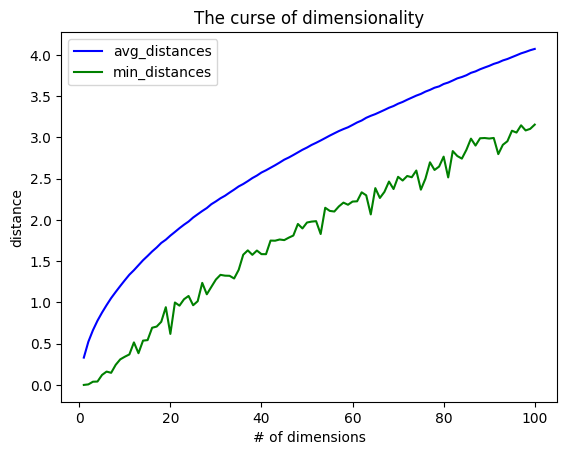

In [66]:
plt.plot(range(1, 101), avg_distances, 'b', label='avg_distances')
plt.plot(range(1, 101), min_distances, 'g', label='min_distances')
plt.legend()
plt.title('The curse of dimensionality')
plt.xlabel('# of dimensions')
plt.ylabel('distance')
plt.show()

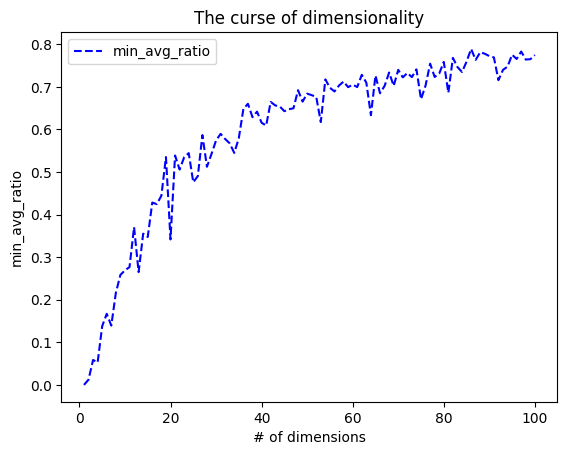

In [67]:
plt.plot(range(1, 101), min_avg_ratio, 'b--', label='min_avg_ratio')
plt.legend()
plt.title('The curse of dimensionality')
plt.xlabel('# of dimensions')
plt.ylabel('min_avg_ratio')
plt.show()